This is a solution to a problem from Stratascratch here: https://platform.stratascratch.com/data-projects/voice-recordings-analysis

## The problem
The following assignment will let you extract, explore and analyze audio data from English speaking male and
females, and build learning models aimed to predict a given person's gender using vocal features, such as
mean frequency, spectral entropy or mode frequency.

Contrary to most online communities that share datasets for data science, machine learning and artificial
intelligence applications, readymade datasets rarely exist out in the wild, and you will have to explore one or
more ways of downloading and extracting meaningful features from a raw dataset containing thousands of
individual audio files.

## Question Set
The following are reference points that should be taken into account in the submission. Please use
them to guide the reasoning behind the feature extraction, exploration, analysis and model building, rather than
answer them point blank.

1. How did you go about extracting features from the raw data?
2. Which features do you believe contain relevant information?
3. How did you decide which features matter most?
4. Do any features contain similar information content?
5. Are there any insights about the features that you didn't expect? If so, what are they?
6. Are there any other (potential) issues with the features you've chosen? If so, what are they?
7. Which goodness of fit metrics have you chosen, and what do they tell you about the model(s) performance?
8. Which model performs best?
9. How would you decide between using a more sophisticated model versus a less complicated one?
10. What kind of benefits do you think your model(s) could have as part of an enterprise application or service?

### Data Description
The provided dataset is a small extract from a repository of voice recordings. The raw data is compressed using `.tgz` files. The extract contains 100 such files with 1000 voice samples in total. Each sample is a recording of a short English sentence spoken by either a male or a female speaker. The format of a sample is `.wav` with a sampling rate of 16kHz and a bit depth of 16-bit.

Each `.tgz` compressed file contains the following directory structure and files:
`<file>/` \
`etc/` \
`GPL_license.txt` \
`HDMan_log` \
`HVite_log` \
`Julius_log` \
`PROMPTS` \
`prompts-original` \
`README` \
`LICENSE` \
`wav/` \
10 unique `.wav` audio files

However, to increase the performance of a model, you may fetch the data directly from the original repository
that can be found [here](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/16kHz_16bit/). This repository consists of over 100,000 audio samples. The total size of the raw dataset
is approximately 12.5 GB once it has been uncompressed.

### Useful features
1. Mean frequency (in kHz)
2. Standard deviation of frequency
3. Median frequency (in kHz)
4. First quantile (in kHz)
5. Third quantile (in kHz)
6. Inter-quantile range (in kHz)
7. Skewness
8. Kurtosis
9. Mode frequency
10. Peak frequency

### References
I looked at a bunch of articles, videos, and discussions about how audio classification is done using both traditional ML approaches as well as with Deep Learning, since I'd never worked with audio data previously. Here are a couple of references for the same.

- Library to process audio features - https://librosa.org/doc/latest/index.html
- Audio classification using ML approaches (Librosa and scikit-learn) https://towardsdatascience.com/urban-sound-classification-with-librosa-nuanced-cross-validation-5b5eb3d9ee30
- Audio Classification using Deep Learning (PyTorch) https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5
- Audio Classification using HuggingFace Transformers - https://huggingface.co/docs/transformers/en/tasks/audio_classification 

### Exploring a sample
Let's see what one of these samples looks like to get an idea of how we'll process it. For a start, I'm going to explore this problem with the limited dataset that's been provided. Once I have an idea of how the models perform, I'll maybe download the whole dataset mentioned above to increase the performance of the model(s).

In [1]:
import tarfile
import os

# Path to the .tgz file
tgz_file_path = './datasets/anonymous-20170304-aiv.tgz'

# Directory where you want to extract the files
extract_dir = './datasets/extracted_files/anonymous-20170304-aiv'

# Create directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the .tgz file
with tarfile.open(tgz_file_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

In [7]:
import os

# List all files in the extracted directory
extracted_files = os.listdir(f'{extract_dir}/anonymous-20170304-aiv/wav')
extracted_other_files = os.listdir(f'{extract_dir}/anonymous-20170304-aiv/etc')

# Filter .wav files
wav_files = [file for file in extracted_files if file.endswith('.wav')]

# List other files that might be useful for analysis
other_files = [file for file in extracted_other_files]

# Display extracted .wav files
print("Extracted .wav files:")
print(wav_files)

# Display other useful files
print("Other useful files:")
print(other_files)

Extracted .wav files:
['en-0630.wav', 'en-0624.wav', 'en-0625.wav', 'en-0627.wav', 'en-0626.wav', 'en-0622.wav', 'en-0623.wav', 'en-0621.wav', 'en-0628.wav', 'en-0629.wav']
Other useful files:
['Julius_log', 'HDMan_log', 'README', 'PROMPTS', 'prompts-original', 'HVite_log', 'GPL_license.txt']


In [10]:
import librosa

# Example: Load a .wav file
wav_file_path = os.path.join(f'{extract_dir}/anonymous-20170304-aiv/wav', wav_files[0])  # Replace with the path to your .wav file
audio_data, sampling_rate = librosa.load(wav_file_path, sr=16000)  # Load with a specified sampling rate (16kHz)

# Perform further audio processing and analysis as needed
# Example: Extract audio features using librosa
mean_frequency = librosa.feature.spectral_centroid(y=audio_data, sr=sampling_rate)
mean_frequency

array([[1468.41696587, 2043.83494913, 2578.91855465, 2751.25504367,
        2695.98192392, 2483.69039571, 2165.16675098, 1745.47575241,
        1533.32486572, 1371.9401779 , 1324.7453616 , 1340.42914597,
        1657.41233716, 1861.48003991,  691.48399587,  811.17547995,
         992.55118279, 1063.39471745, 1055.56883109, 1152.38362863,
        1206.36323495, 1276.69515242, 1130.25349827, 1085.87147617,
        1503.80870417, 2541.43175658, 2523.47326598, 2134.97569356,
        1423.72690301,  876.40562024,  905.68418395,  904.40153547,
         777.65318653,  775.62777996,  800.86498814,  714.75033442,
         511.28020685,  473.51409896,  517.61491446,  615.18003699,
         625.1246276 ,  629.12133143,  604.90229661,  727.35875363,
         857.95115263,  811.23492834,  921.64392419, 1224.22550467,
        1899.47835779, 1535.87043669, 1034.21411718, 1073.1777307 ,
        1080.22367124, 1077.13619822, 1285.30600822, 1051.00929144,
         827.42933535, 2561.035626  , 5241.14216

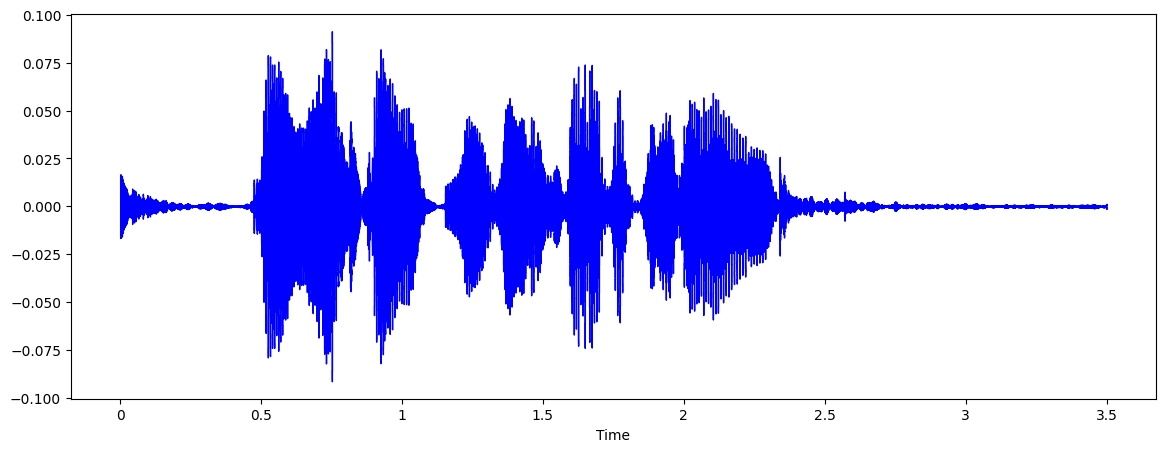

In [14]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
librosa.display.waveshow(audio_data, sr = sampling_rate, color="blue")

In [16]:
from IPython.display import Audio
Audio(audio_data, rate = sampling_rate)

In [17]:
print('Example shape ', audio_data.shape, 'Sample rate ', sampling_rate, 'Data typt ', type(audio_data))

Example shape  (56000,) Sample rate  16000 Data typt  <class 'numpy.ndarray'>


In [18]:
print(audio_data[22400:22420])

[0.01721191 0.01596069 0.0123291  0.0085144  0.00650024 0.00778198
 0.00875854 0.00900269 0.00875854 0.01062012 0.01184082 0.01348877
 0.01333618 0.01229858 0.01318359 0.01382446 0.01419067 0.0133667
 0.01300049 0.01211548]


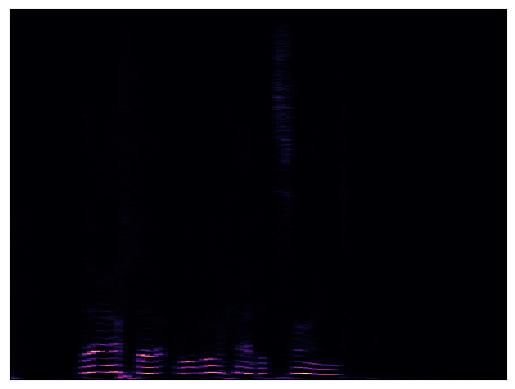

In [35]:
import numpy as np
sgram = np.abs(librosa.stft(audio_data))
librosa.display.specshow(sgram)

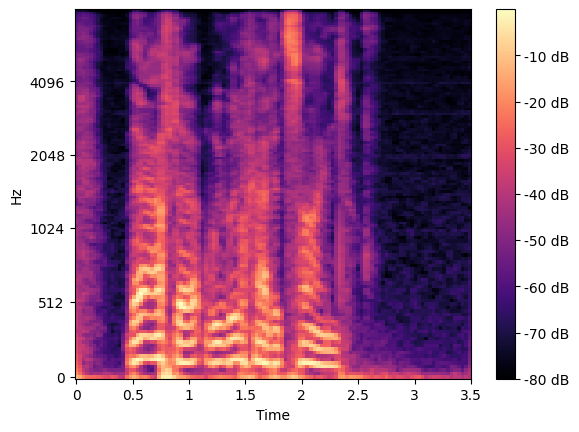

In [38]:
import numpy as np
# Convert spectrogram to mel scale
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram, sr=sampling_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref = np.max)

# Display the mel spectrogram
librosa.display.specshow(mel_sgram, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format = '%+2.0f dB')

For problems dealing with human spech, MFCC (Mel Frequency Cepstral Coefficients) works better. This allows us to select a compressed representation of the frequency bands from the Mel Spectrogram that correspond to the most common frequences at which humans speak. (0-280Hz)

MFCC is of type <class 'numpy.ndarray'> with shape (20, 110)


/Users/kevinvegda/Desktop/stratascratch projects/voice_recordings_analysis/audio_processing/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/kevinvegda/Desktop/stratascratch projects/voice_recordings_analysis/audio_processing/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


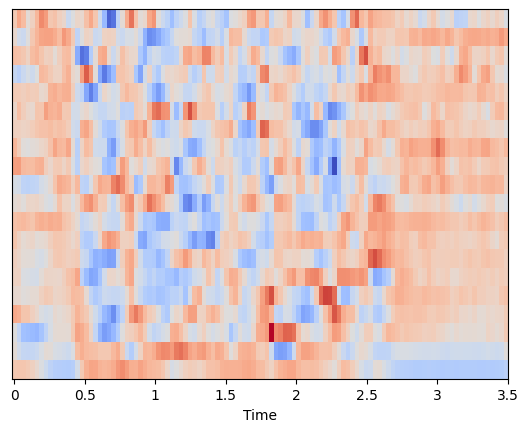

In [42]:
import sklearn
import sklearn.preprocessing
mfcc = librosa.feature.mfcc(y = audio_data, sr = sampling_rate)

#Center the MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis = 1)
librosa.display.specshow(mfcc, sr = sampling_rate, x_axis = 'time')

print(f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')

### Data Augmentation

For the spectrograms, we use a method know as SpecAugment where we block out sections of the spectrogram. We can frequency mask (horizontal bars) or time mask.(vertical bars) These methods will be useful when we use Deep Learning.

For the raw audio, we could time shift (shift audio to the left or right by a random amount). For sounds such as human speech where order matters, we can fill the gaps with silence. We can also pitch shift - randomly modify the frequency of parts of the sound. Other methods of augmenting the raw audio are Time Stretch - randomly slowing down or speeding up the sound, and adding Noise. These methods might be useful even with traditional ML approaches where we're doing feature extraction.

In [1]:
import os
import random
import torch
import torchaudio
from torchaudio import transforms

class AudioUtil():
    @staticmethod
    def open(audio_file):
        sig, sr = torchaudio.load(audio_file)
        return (sig, sr)
    
    @staticmethod
    def rechannel(aud, new_channel):
        sig, sr = aud

        if (sig.shape[0] == new_channel):
            return aud
        
        if (new_channel == 1):
            resig = sig[:1, :]
        else:
            resig = torch.cat([sig, sig])

        return ((resig, sr))
    
    @staticmethod
    def resample(aud, newsr):
        sig, sr = aud

        if (sr == newsr):
            return aud
        
        num_channels = sig.shape[0]

        resig = transforms.Resample(sr, newsr)(sig[:1,:])
        if (num_channels > 1):
            retwo = transforms.Resample(sr, newsr)(sig[1:,:])
            resig = torch.cat([resig, retwo])

        return ((resig, newsr))
    
    @staticmethod
    def pad_trunc(aud,max_ms):
        sig, sr = aud
        num_rows, sig_len = sig.shape
        max_len = sr // 1000 * max_ms

        if (sig_len > max_len):
            sig = sig[:, :max_len]
        elif(sig_len < max_len):
            pad_begin_len = random.randint(0, max_len - sig_len)
            pad_end_len = max_len - sig_len - pad_begin_len

            pad_begin = torch.zeros((num_rows, pad_begin_len))
            pad_end = torch.zeros((num_rows, pad_end_len))

            sig = torch.cat((pad_begin, sig, pad_end), 1)

        return (sig, sr)
    
    @staticmethod
    def time_shift(aud, shift_limit):
        sig, sr = aud
        _, sig_len = sig.shape
        shift_amt = int(random.random() * shift_limit * sig_len)
        return ((sig.roll(shift_amt), sr))
    
    @staticmethod
    def spectro_gram(aud, n_mels = 64, n_fft = 1024, hop_len = None):
        sig, sr = aud
        top_db = 80

        spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len,n_mels=n_mels)(sig)

        spec = transforms.AmplitudeToDB(top_db = top_db)(spec)
        return (spec)
    
    @staticmethod
    def spectro_augment(spec, max_mask_pct = 0.1, n_freq_masks = 1, n_time_masks = 1):
        _, n_mels, n_steps = spec.shape
        mask_value = spec.mean()
        aug_spec = spec

        freq_mask_param = max_mask_pct * n_mels
        for _ in range(n_freq_masks):
            aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

        time_mask_param = max_mask_pct * n_steps
        for _ in range(n_time_masks):
            aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

        return aug_spec



### Dataset

We're going to load our samples and see how the distribution of genders in there looks

In [4]:
from torch.utils.data import Dataset
from collections import Counter

class AudioDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = str(data_dir)
        self.duration = 1000
        self.sr = 44100
        self.channel = 2
        self.shift_pct = 0.4
        self.gender_labels_list = []
        
        #load all the samples
        self.samples = self._load_samples()

        self.gender_labels_counts = self._get_gender_labels_counts()

    def _load_samples(self):
        samples = []
        folders = os.listdir(self.data_dir)

        for folder in folders:
            wav_dir = os.path.join(self.data_dir, folder, folder, "wav")
            etc_dir = os.path.join(self.data_dir, folder, folder, "etc")

            if os.path.exists(wav_dir) and os.path.exists(etc_dir):
                audio_files = [f for f in os.listdir(wav_dir) if f.endswith("wav")]
                metadata_file = os.path.join(etc_dir, "README")

                with open(metadata_file, "r", encoding = "utf-8") as f:
                    metadata_lines = f.readlines()
                    for line in metadata_lines:
                        if line.startswith("Gender:"):
                            gender = line.strip().split(":")[1].strip()
                            if gender:  # Ensure gender is not empty
                                self.gender_labels_list.append(gender)
                            break
                
                if self._is_male_gender(gender):
                    gender_label = 0  # Male
                elif self._is_female_gender(gender):
                    gender_label = 1  # Female
                else:
                    continue

                for audio_file in audio_files:
                    audio_path = os.path.join(wav_dir, audio_file)
                    samples.append((audio_path, gender_label))

        return samples
    
    def _get_gender_labels_counts(self):  # Convert set to list
        return Counter(self.gender_labels_list)
    
    def _is_male_gender(self, gender):
        # Define conditions for male gender labels in different languages
        male_labels = ['Male',
         'Masculino',
         'Männlich',
         'Masculin',
         'male']  # Add more as needed
        return gender in male_labels

    def _is_female_gender(self, gender):
        # Define conditions for female gender labels in different languages
        female_labels = ["Female"]  # Add more as needed
        return gender in female_labels
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        audio_path, gender = self.samples[idx]
        aud = AudioUtil.open(audio_path)
        reaud = AudioUtil.resample(aud, self.sr)
        rechan = AudioUtil.rechannel(reaud, self.channel)
        dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
        shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
        sgram = AudioUtil.spectro_gram(shift_aud, n_mels = 64, n_fft = 1024, hop_len=None)
        aud_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
        return aud_sgram, gender

In [2]:
from types import SimpleNamespace

learning_rate = 0.001
num_epochs = 3
BATCH_SIZE = 32

config = SimpleNamespace(
    lr = learning_rate,
    epochs = num_epochs,
    batch_size = BATCH_SIZE,
    log_model = False,
    seed = 42,
    logging_steps = 10
)

In [5]:
from torch.utils.data import DataLoader, random_split

torch.manual_seed(config.seed)

data_dir = "./extracted_data"
dataset = AudioDataset(data_dir)

num_items = len(dataset)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(dataset, [num_train, num_val])

train_dl = DataLoader(train_ds, batch_size=config.batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=config.batch_size, shuffle=False)

In [6]:
dataset._get_gender_labels_counts()

Counter({'Male': 59,
         'Female': 24,
         'Please Select': 8,
         'Masculino': 4,
         'Männlich': 3,
         'Masculin': 1,
         'male': 1})

As we can see, the above is the breakdown of the labels in our dataset. We've substituted the words for Male with class label 1 and the words for Female with class Label 2.

In [7]:
from torch.nn import init
from torch import nn

class GenderClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        conv_layers = []

        #First convolutional block with ReLU and Batch Norm. Using Kaiming initialisation
        self.conv1 = nn.Conv2d(2,8, kernel_size=(5,5), stride=(2,2), padding=(2,2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a = 0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        #Second convolutional block
        self.conv2 = nn.Conv2d(8,16, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a = 0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        #Third convolutional block
        self.conv3 = nn.Conv2d(16,32, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a = 0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        #Fourth convolutional block
        self.conv4 = nn.Conv2d(32,64, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a = 0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        #Linear classification layer
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=2)

        #Wrape the convolutional blocks
        self.conv = nn.Sequential(*conv_layers)

    def forward(self, x):
        #(batch_sz, num_channels (depth), Mel_freq_bands (height), time_steps (width))
        x = self.conv(x)

        #(batch_size, depth(increased), height(decreased), width(decreased))
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        #(batch_size, depth)
        x = self.lin(x)
        #(batch_size, labels)

        return x

In [9]:
model = GenderClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [12]:
import wandb
import os

os.environ["WANDB_NOTEBOOK_NAME"] = "gender_classification"

wandb.login()

True

In [18]:
from tqdm import tqdm

config.epochs = 10

def training(model, train_dl):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = config.lr)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
                                                   optimizer, 
                                                   max_lr = config.lr, 
                                                   steps_per_epoch=int(len(train_dl)), 
                                                   epochs = config.epochs,
                                                   anneal_strategy='linear'
                                                   )
    
    train_step = 0
    for epoch in tqdm(range(config.epochs)):
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

        for i, data in tqdm(enumerate(train_dl)):
            inputs, labels = data[0].to(device), data[1].to(device)

            #normalize the input
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            train_step += 1

            running_loss += loss.item()

            _, prediction = torch.max(outputs, 1)
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

            if i % config.logging_steps == 0:    # print every 10 mini-batches, log on WandB
                wandb.log({"train/loss": loss.item(),
                       "train/accuracy": correct_prediction / total_prediction,
                       "train/learning_rate": scheduler.get_last_lr()[0],
                       "train/global_step": train_step})

        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches
        acc = correct_prediction / total_prediction
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

    print("Finished Training")

with wandb.init(
    project="gender-classification",
    job_type="train",
    config = config,
    tags =["classification", "pytorch"]
):
    training(model, train_dl)


23it [00:03,  5.79it/s]00:00<?, ?it/s]
 10%|█         | 1/10 [00:03<00:35,  3.97s/it]

Epoch: 0, Loss: 0.47, Accuracy: 0.80


23it [00:03,  6.58it/s]
 20%|██        | 2/10 [00:07<00:29,  3.70s/it]

Epoch: 1, Loss: 0.43, Accuracy: 0.83


23it [00:03,  6.39it/s]
 30%|███       | 3/10 [00:11<00:25,  3.65s/it]

Epoch: 2, Loss: 0.39, Accuracy: 0.85


23it [00:03,  6.40it/s]
 40%|████      | 4/10 [00:14<00:21,  3.63s/it]

Epoch: 3, Loss: 0.32, Accuracy: 0.88


23it [00:04,  5.54it/s]
 50%|█████     | 5/10 [00:18<00:19,  3.82s/it]

Epoch: 4, Loss: 0.27, Accuracy: 0.90


23it [00:03,  5.79it/s]
 60%|██████    | 6/10 [00:22<00:15,  3.87s/it]

Epoch: 5, Loss: 0.25, Accuracy: 0.90


23it [00:03,  5.77it/s]
 70%|███████   | 7/10 [00:26<00:11,  3.91s/it]

Epoch: 6, Loss: 0.21, Accuracy: 0.93


23it [00:03,  6.74it/s]
 80%|████████  | 8/10 [00:30<00:07,  3.75s/it]

Epoch: 7, Loss: 0.21, Accuracy: 0.93


23it [00:04,  5.28it/s]
 90%|█████████ | 9/10 [00:34<00:03,  3.94s/it]

Epoch: 8, Loss: 0.18, Accuracy: 0.93


23it [00:04,  5.66it/s]
100%|██████████| 10/10 [00:38<00:00,  3.86s/it]


Epoch: 9, Loss: 0.20, Accuracy: 0.92
Finished Training


train/accuracy,▃▁▁▄▃▂▂▃▃▄▄▄▅▅▅▃▄▄▆▆▆▆▅▆█▆▆▆▆▆
train/global_step,▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇██
train/learning_rate,▁▂▃▄▅▆▆▇███▇▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▂▁▁
train/loss,▆█▇▅▆▆▆▆▅▅▆▇▄▄▃▄▆▄▃▂▃▂▂▂▁▅▅▂▁▄
train/accuracy,0.92708
train/global_step,228
train/learning_rate,1e-05
train/loss,0.25871


In [19]:
def inference(model, val_dl):
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for i, data in tqdm(enumerate(val_dl)):
            inputs, labels = data[0].to(device), data[1].to(device)

            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

            outputs = model(inputs)

            _, prediction = torch.max(outputs, 1)
            correct_predictions += (prediction == labels).sum().item()
            total_predictions += prediction.shape[0]

    acc = correct_predictions / total_predictions
    wandb.log({"valid/acc": acc, "total_predictions": total_predictions})
    print(f'Accuracy: {acc:.2f}, Total items: {total_predictions}')

In [21]:
with wandb.init(project = "gender-classification", job_type = "validation"):
    inference(model, val_dl)

6it [00:01,  4.84it/s]


Accuracy: 0.96, Total items: 183


total_predictions,▁
valid/acc,▁
total_predictions,183
valid/acc,0.96175


As we can see, we're getting quite good accuracy on validation. We could expand the training data to include all the 12.5GB of audio data given on the voxforge site, but it doesn't seem necessary at least for the deep learning model.